In [2]:
#from ensemble.compress import decompress
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from params import orig_height, orig_width
import cv2
import matplotlib
matplotlib.rcParams['figure.figsize'] = [20,20]

Using TensorFlow backend.


In [3]:
df_train = pd.read_csv('input/train_masks.csv')
ids_train = df_train['img'].map(lambda s: s.split('.')[0])

ids_train_split, ids_valid_split = train_test_split(ids_train, test_size=0.1, random_state=42)

df_test = pd.read_csv('input/sample_submission.csv')
ids_test = df_test['img'].map(lambda s: s.split('.')[0])

/home/pl57/.local/lib/python2.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  # This is added back by InteractiveShellApp.init_path()


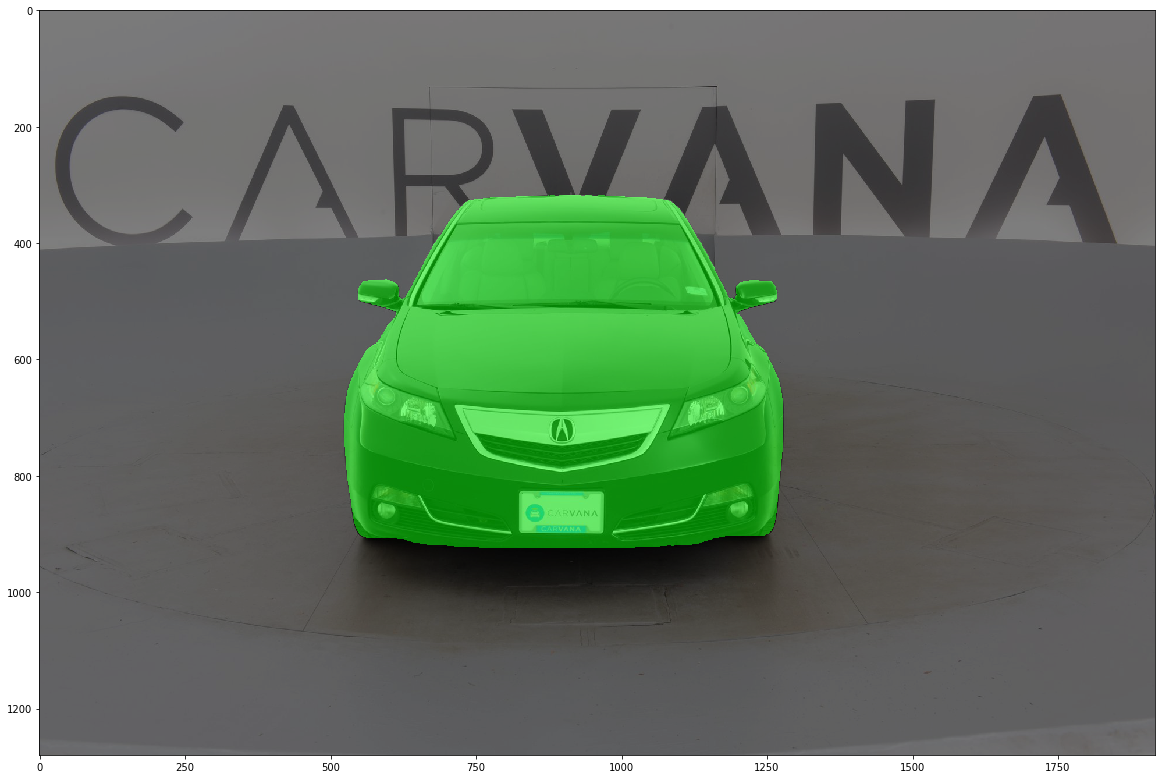

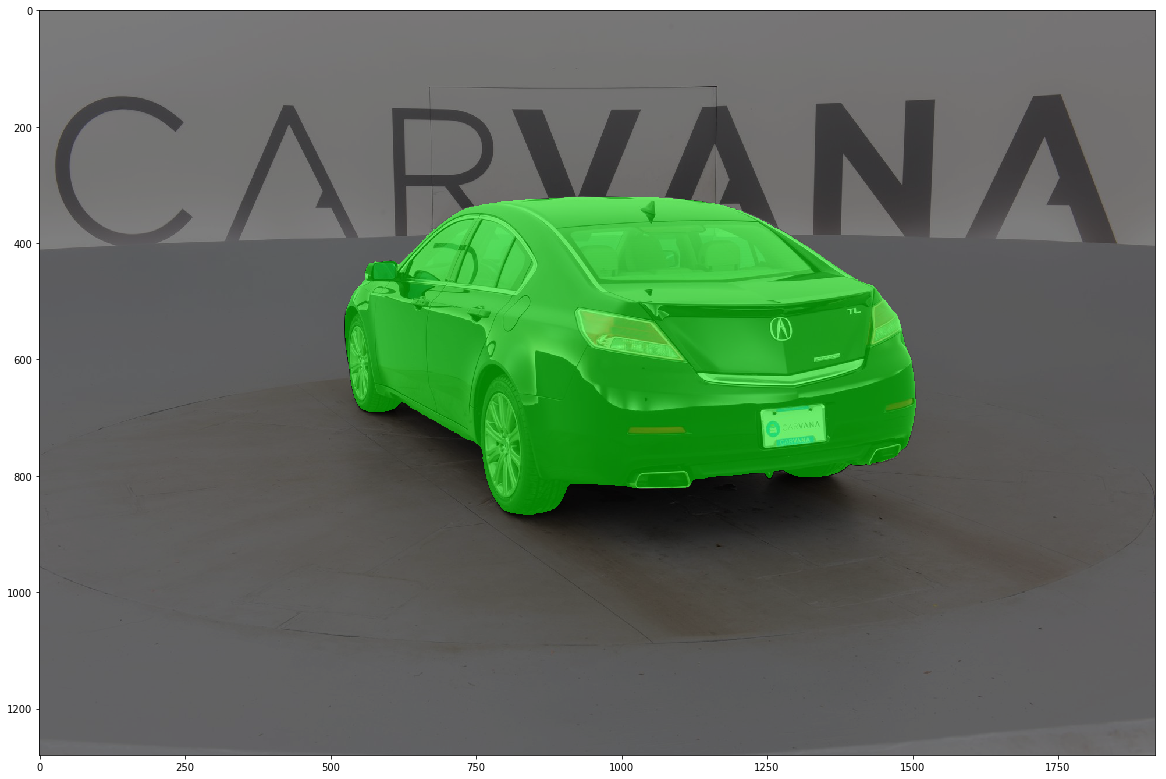

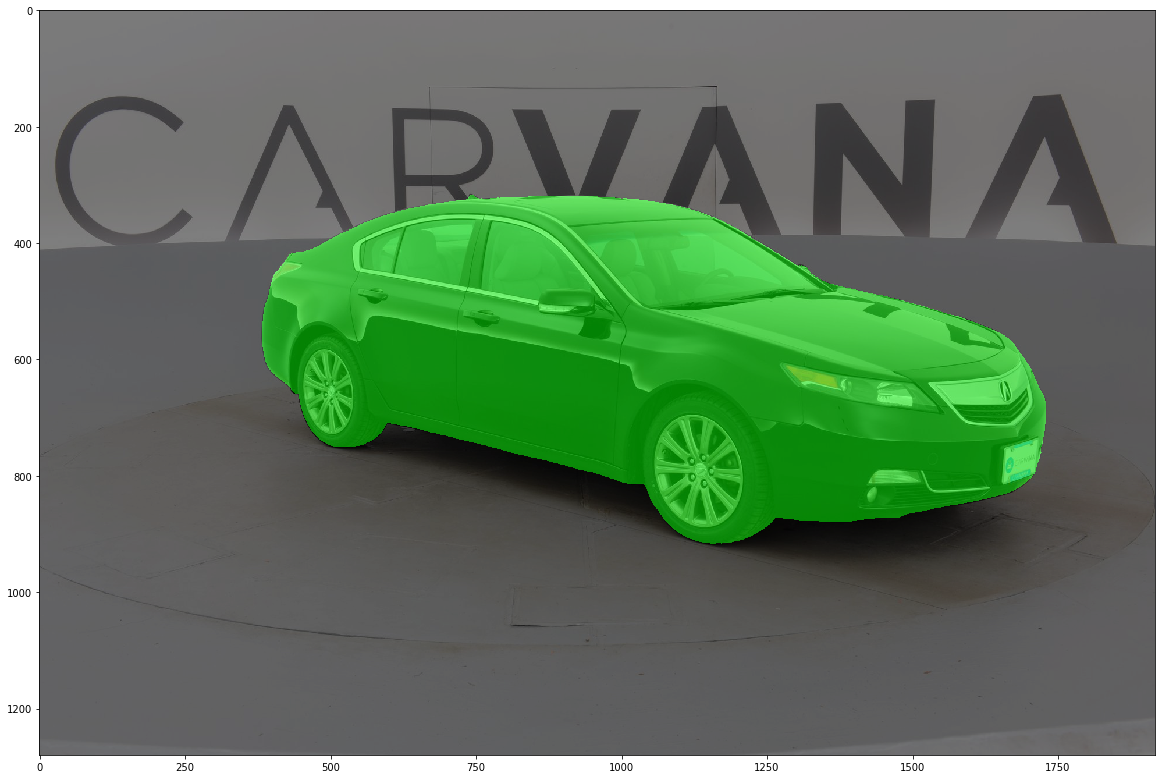

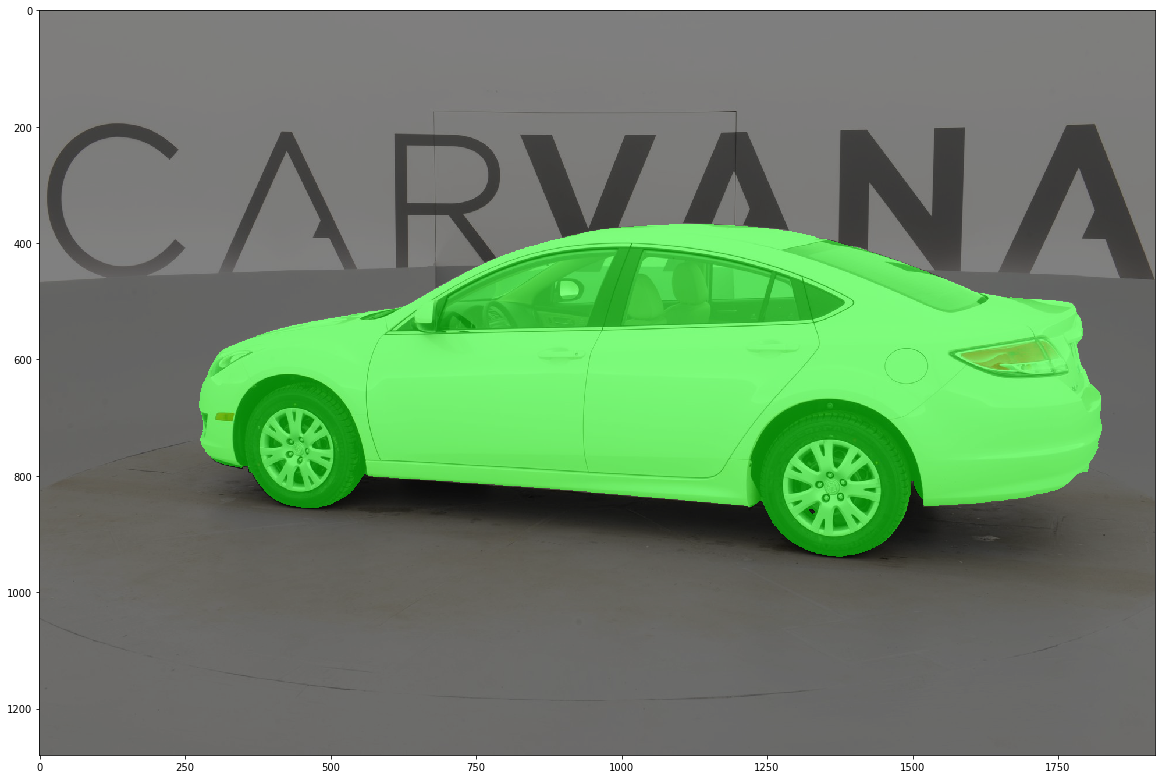

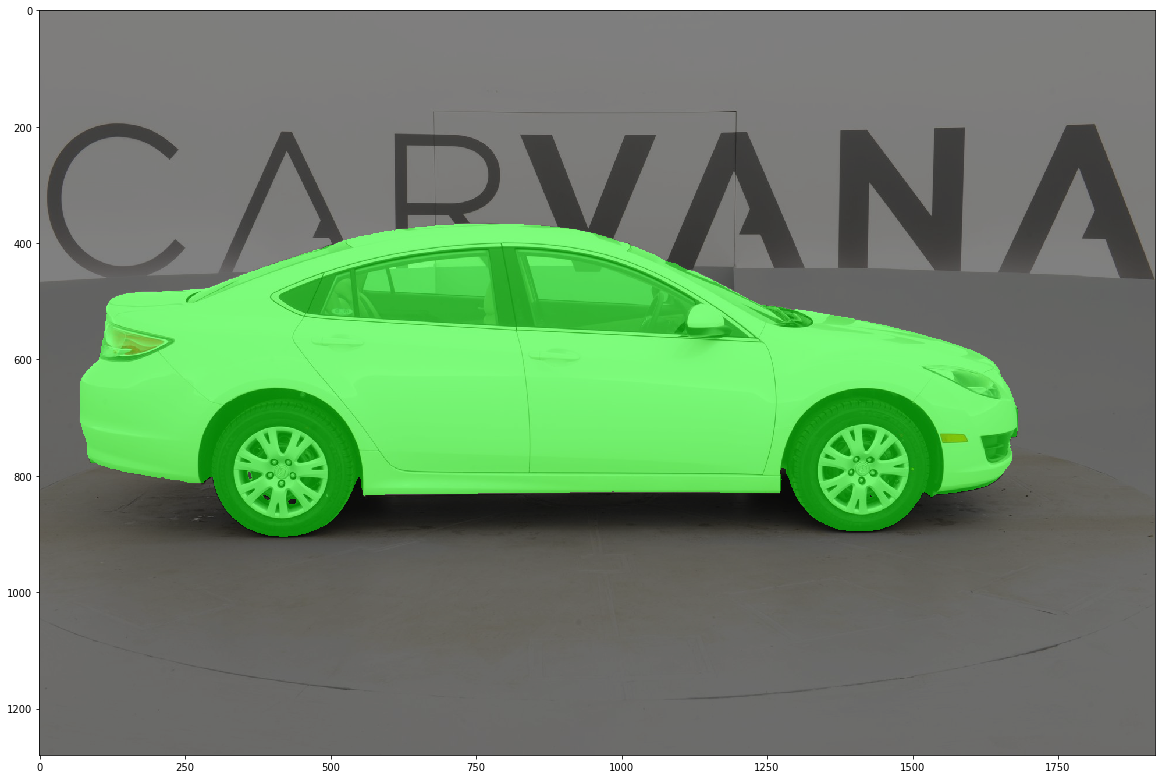

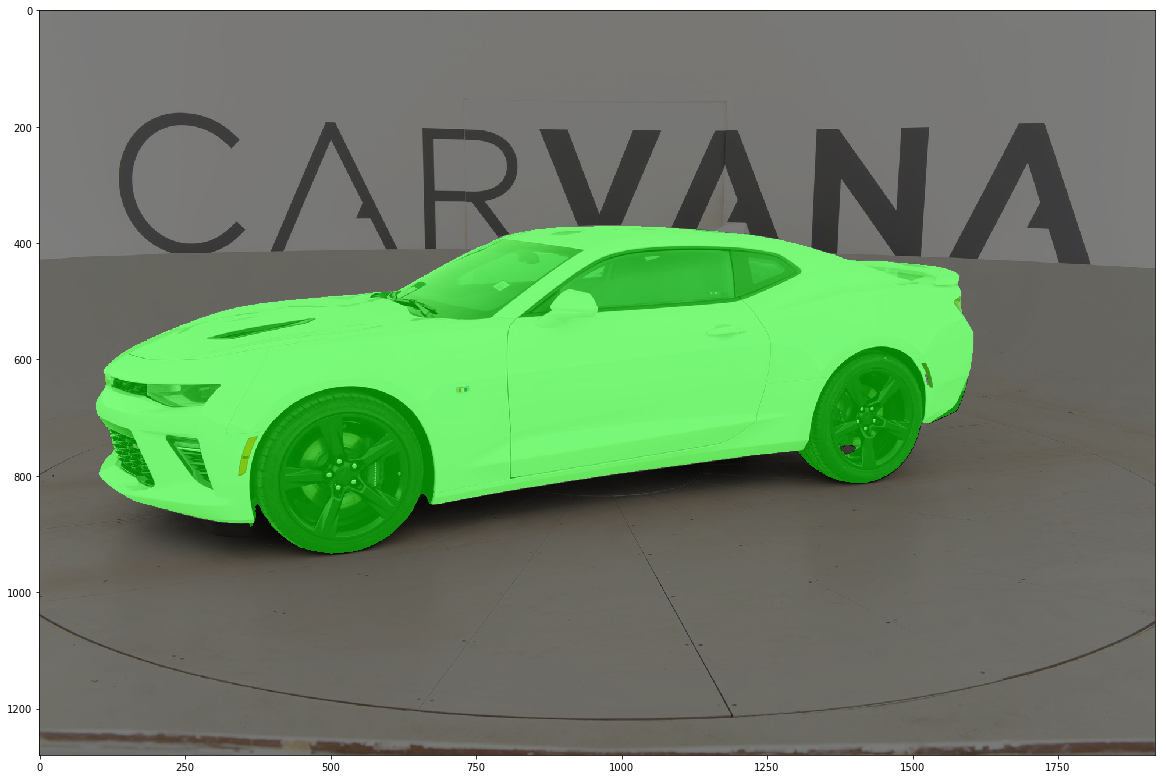

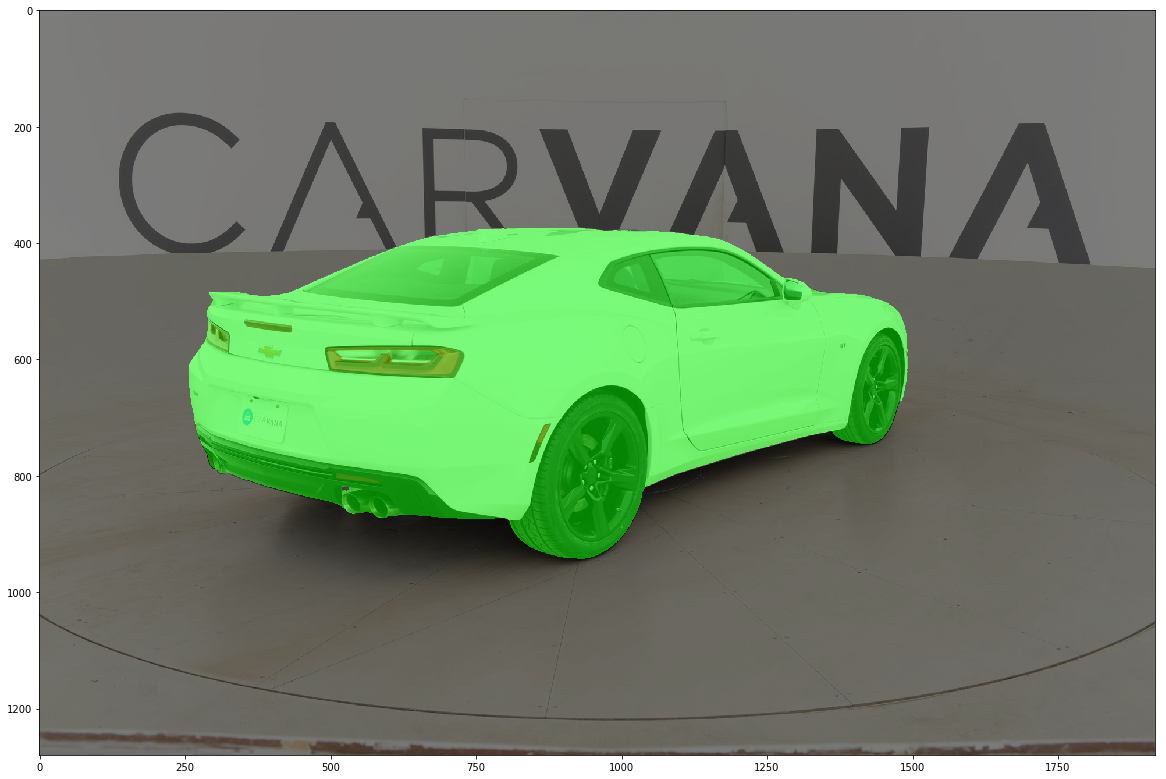

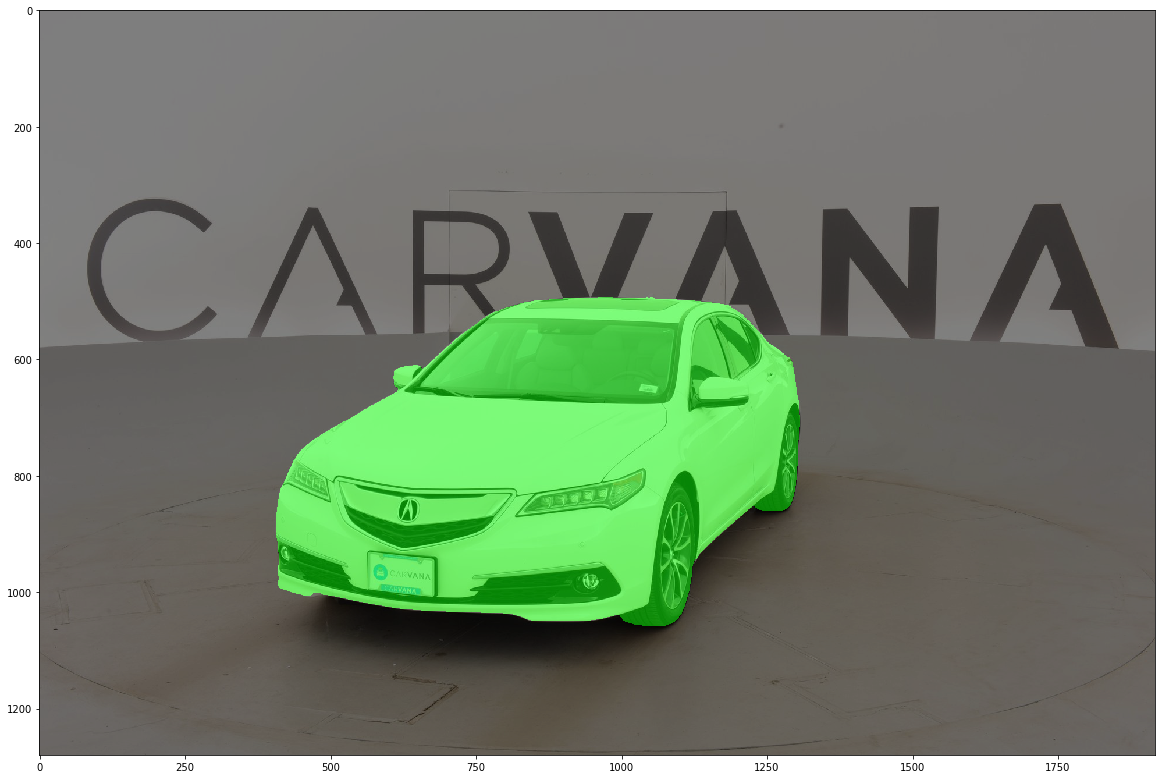

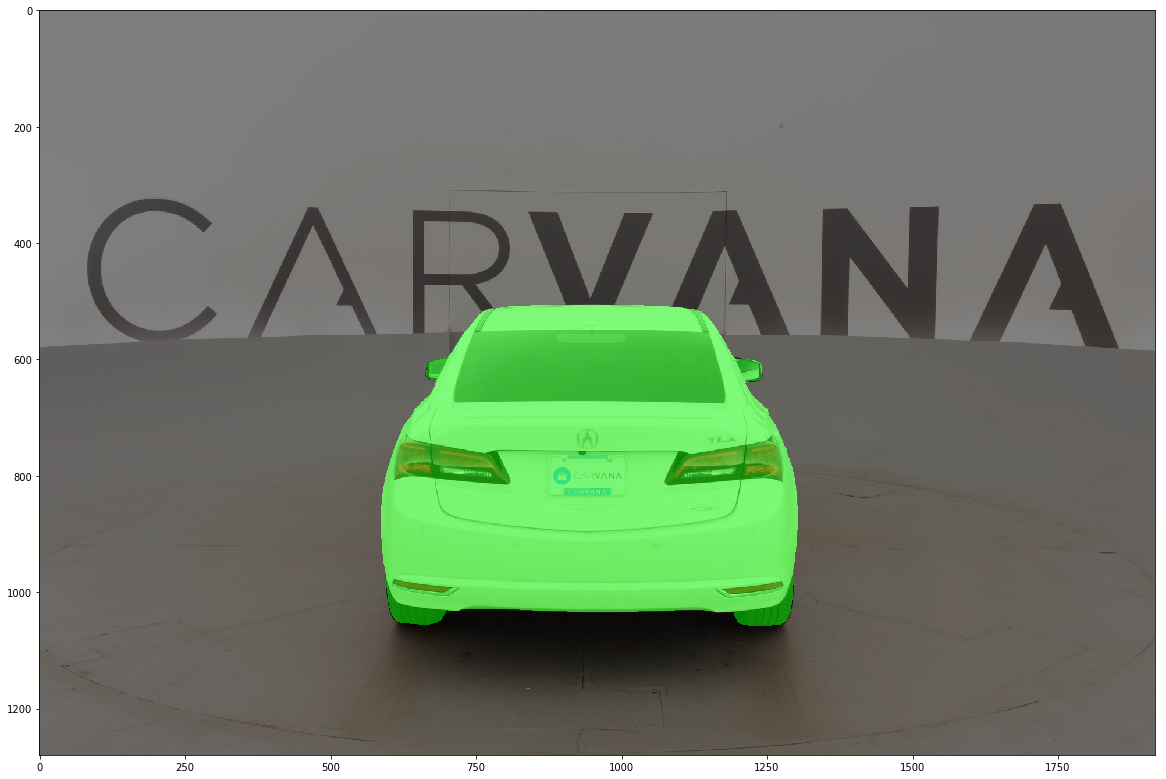

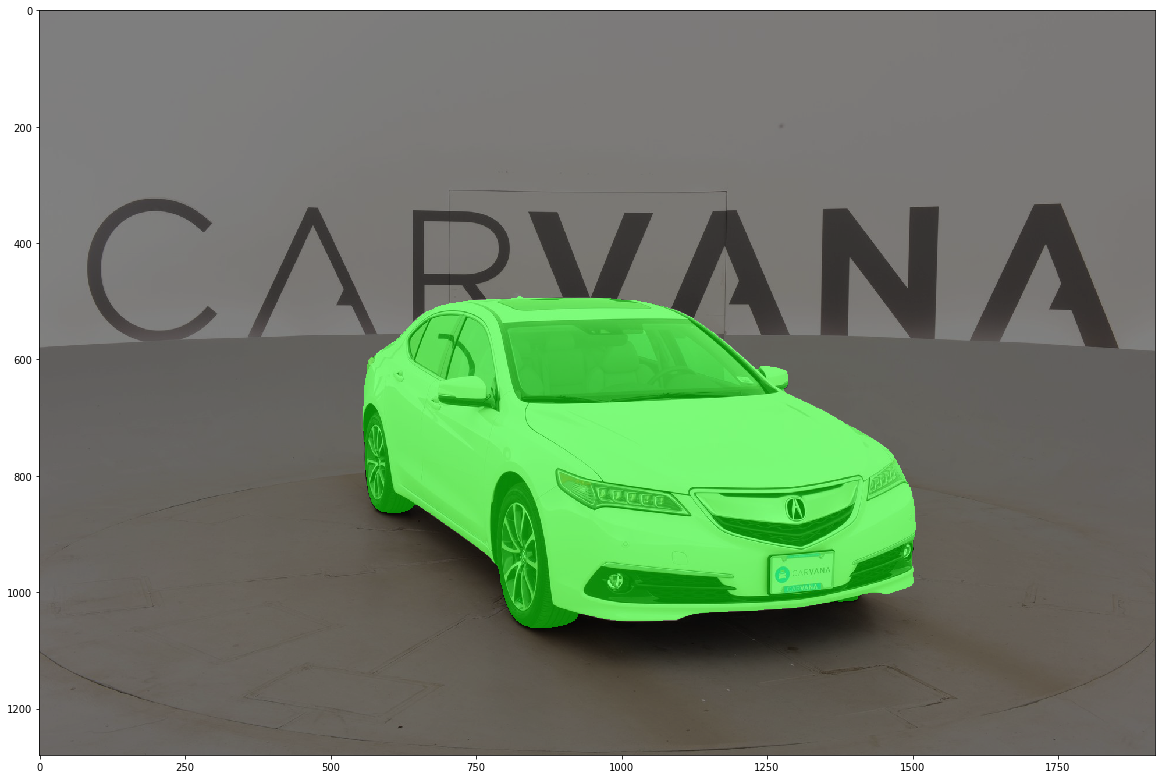

In [38]:
for id in ids_test[:70:7]:
    def load_file(id):
        prediction = np.load("/home/pl57/data/carvana/modelG/test/test_predictions/{}.npy".format(id))
        return prediction
    mask = load_file(id)
    mask[mask > .5] = 1
    mask[mask < .5] = 0
    img = mpimg.imread('input/test_hq/{}.jpg'.format(id))
#     plt.imshow(img)
#     plt.show()
    mask3 = -np.expand_dims(mask, 3).repeat(3, axis=2) * (0, 1, 0)
    mask3 = np.array(mask3, dtype='uint8')
#     img = img * mask3
    cv2.addWeighted(mask3, .5, img, .5, 0, img)
    plt.imshow(img)
    plt.show()

In [3]:
def load_file(id):
    prediction = np.load("/home/pl57/data/carvana/modelG/test/test_predictions/{}.npy".format(id))
    return np.expand_dims(prediction, axis=2)
predictions = [load_file(id) for id in ids_test[:5]]
predictions[0].shape

(1280, 1918, 1)